Total steps to reach max spread: 5
Final number of infected nodes: 10000


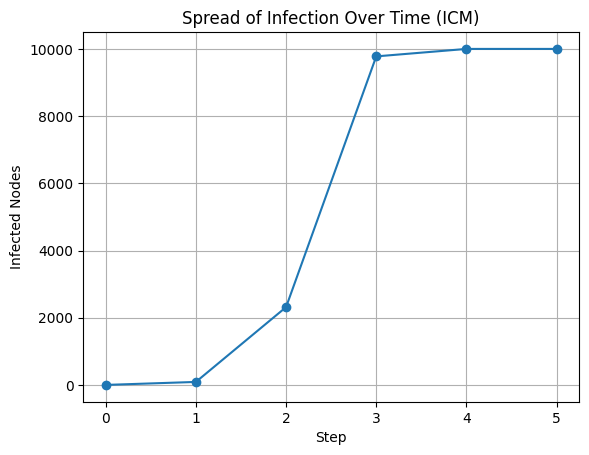

In [ ]:
import networkx as nx
import random

# Load the edge list from the text file
G = nx.read_edgelist('S.txt', nodetype=int)

# Independent Cascade Model
def independent_cascade(G, seed, p=0.1):
    active = set([seed])
    newly_active = set([seed])
    steps = 0
    timeline = [len(active)]

    while newly_active:
        next_newly_active = set()
        for node in newly_active:
            for neighbor in G.neighbors(node):
                if neighbor not in active and random.random() <= p:
                    next_newly_active.add(neighbor)
        newly_active = next_newly_active
        active.update(newly_active)
        steps += 1
        timeline.append(len(active))

    return steps, timeline

# Run the model from node 0
steps, timeline = independent_cascade(G, seed=0, p=0.1)

print(f"Total steps to reach max spread: {steps}")
print(f"Final number of infected nodes: {timeline[-1]}")

# Optional: Plot growth of infected nodes
import matplotlib.pyplot as plt
plt.plot(range(steps + 1), timeline, marker='o')
plt.title("Spread of Infection Over Time (ICM)")
plt.xlabel("Step")
plt.ylabel("Infected Nodes")
plt.grid(True)
plt.show()


In [4]:
import networkx as nx
import numpy as np


# Step 2: Assign normalized random activation probabilities for each node's outgoing edges
activation_prob = {}
for node in G.nodes():
    neighbors = list(G.neighbors(node))
    if neighbors:
        probs = np.random.rand(len(neighbors))
        probs /= probs.sum()  # Normalize to sum = 1
        activation_prob[node] = dict(zip(neighbors, probs))
    else:
        activation_prob[node] = {}

# Step 3: Independent Cascade function with per-edge probability
def independent_cascade(G, seed, activation_prob):
    active = set([seed])
    newly_active = set([seed])
    steps = 0

    while newly_active:
        next_newly_active = set()
        for node in newly_active:
            for neighbor in G.neighbors(node):
                if neighbor not in active:
                    prob = activation_prob.get(node, {}).get(neighbor, 0)
                    if random.random() <= prob:
                        next_newly_active.add(neighbor)
        newly_active = next_newly_active
        active.update(newly_active)
        steps += 1 if newly_active else 0

    return steps, len(active)

# Step 4: Run for 5 random seeds and average
random_seeds = random.sample(list(G.nodes()), 5)
step_results = []

print("Running ICM for 5 random seed nodes:")
for seed in random_seeds:
    steps, total_infected = independent_cascade(G, seed, activation_prob)
    print(f"Seed Node: {seed}, Steps: {steps}, Infected Nodes: {total_infected}")
    step_results.append(steps)

avg_steps = sum(step_results) / len(step_results)
print(f"\nAverage number of steps over 5 runs: {avg_steps:.2f}")


Running ICM for 5 random seed nodes:
Seed Node: 9209, Steps: 1, Infected Nodes: 3
Seed Node: 576, Steps: 2, Infected Nodes: 4
Seed Node: 3877, Steps: 11, Infected Nodes: 34
Seed Node: 3799, Steps: 0, Infected Nodes: 1
Seed Node: 6488, Steps: 3, Infected Nodes: 5

Average number of steps over 5 runs: 3.40
